### Importing Libraries

In [24]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as gp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Input Diabetes Dataset

In [25]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Locate Missing Data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for Duplicates

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [30]:
# Get the shape of the dataframe
df.shape

(768, 9)

In [31]:
# Check for NaN values in Name
df.query(''' `Pregnancies`.isna() ''')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Detect Outliers

In [32]:
# Describing the statistics of the dataset column by column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


### Taking a look at the Outcome column

In [34]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [35]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Checking the Age column visually for irregularity

<Axes: >

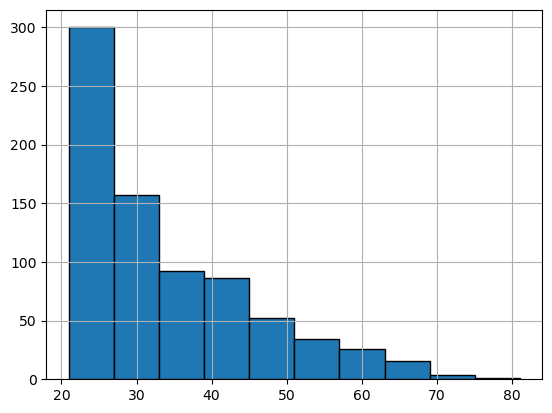

In [36]:
df["Age"].hist(edgecolor = "black")

### Using a histogram plot for all columns against the Outcome column

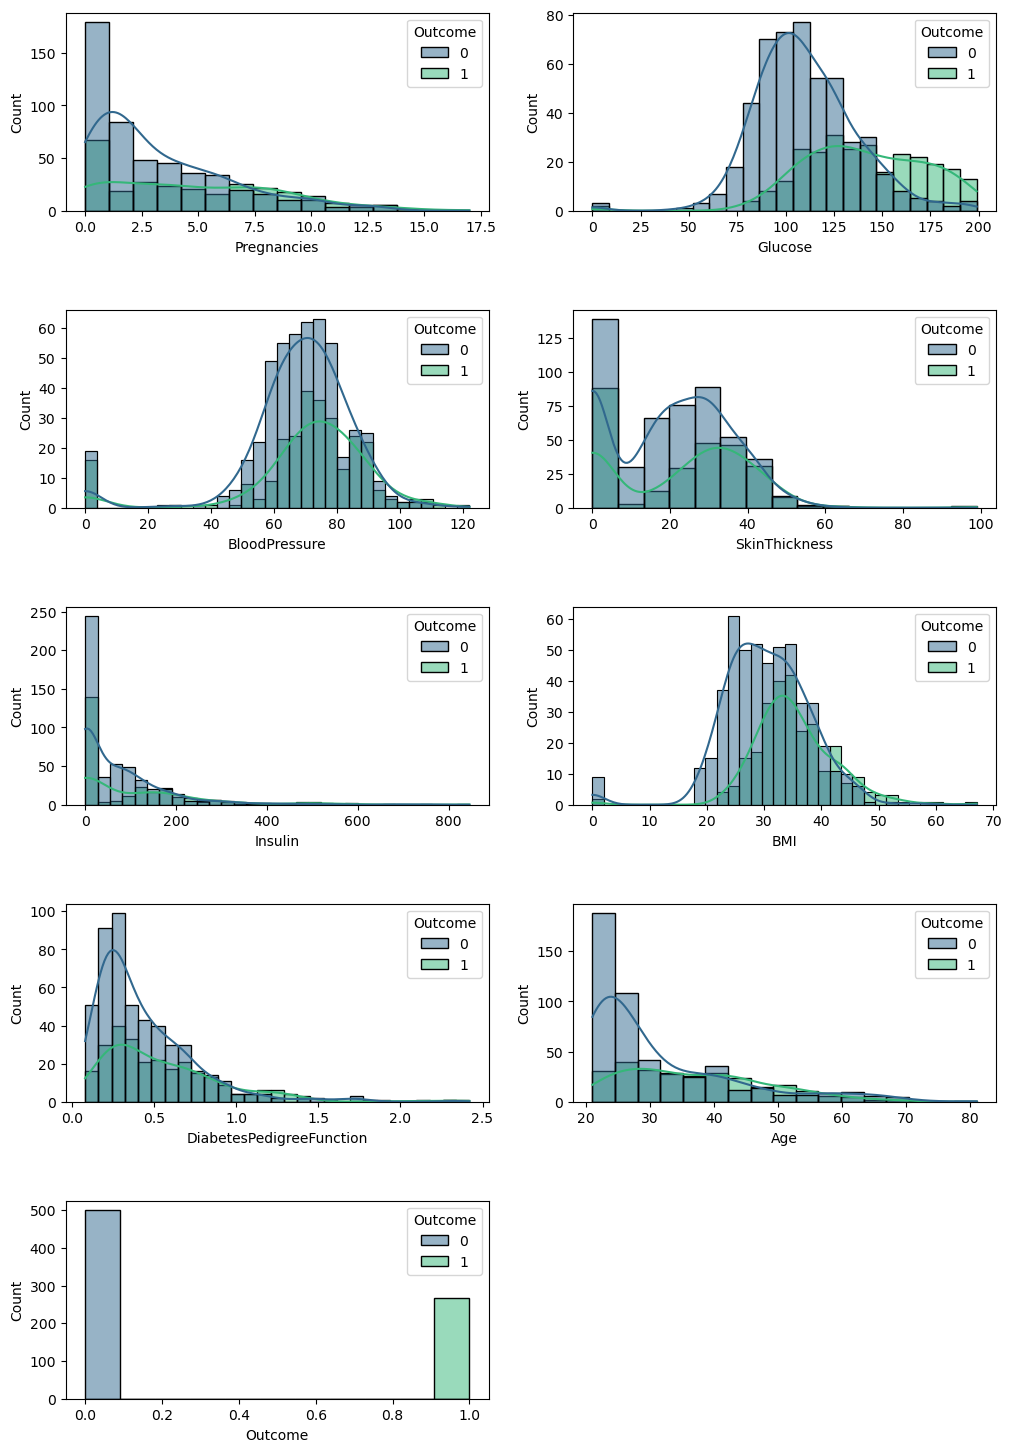

In [37]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, 
                )
    i += 1

### Values that should not be zero includes Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [38]:
# replacing all such values that should not be zero with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [39]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Looking for outliers

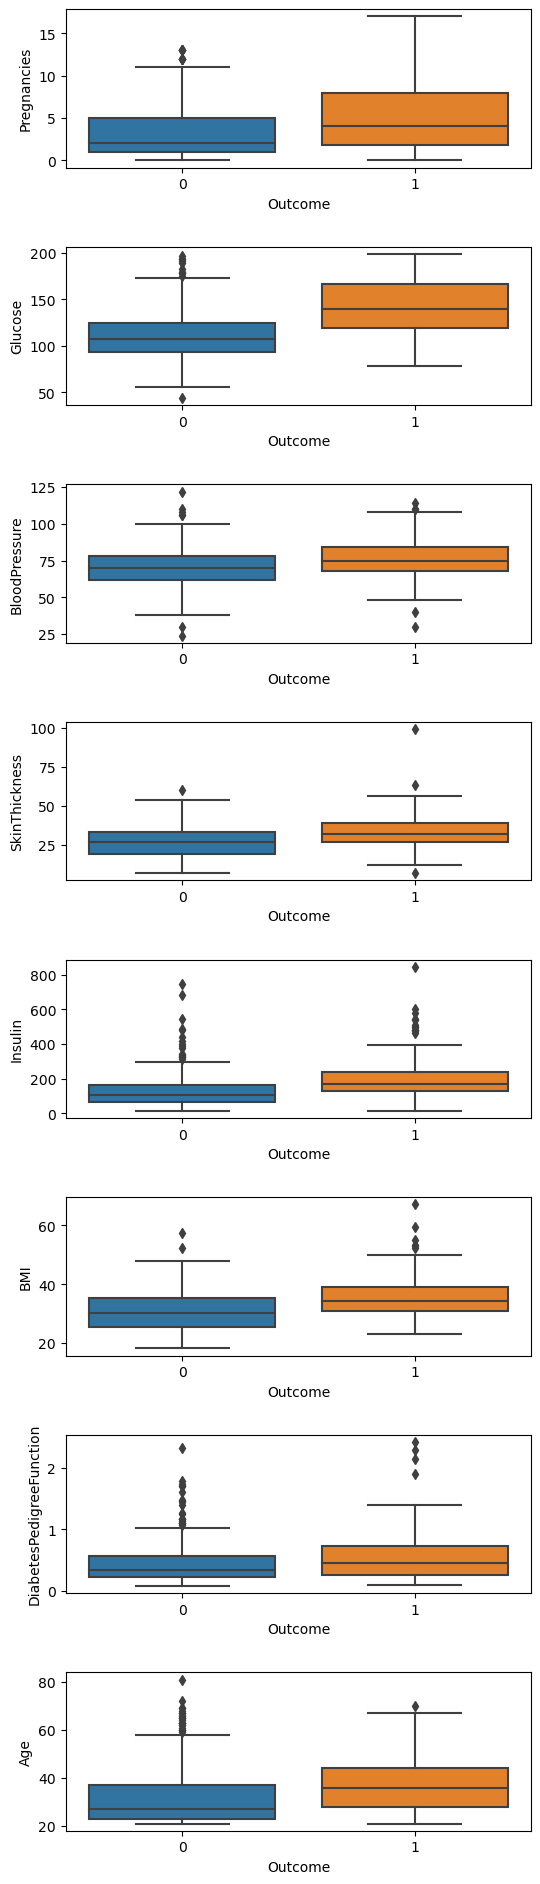

In [40]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=df, x='Outcome', y=col_name)
    i +=1
    


### Showing the Number of Outliers

In [41]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()

Number of outliers


Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### Showing the Number of extreme Outliers

In [42]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of extreme outliers")
((df < lower) + (df > upper)).sum()

Number of extreme outliers


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    6
Age                         0
Outcome                     0
dtype: int64

In [44]:
df[(df['Outcome'] == 0)].quantile(0.5)

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
Name: 0.5, dtype: float64

In [46]:
df[(df['Outcome'] == 1)].quantile(0.5)

Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
Name: 0.5, dtype: float64

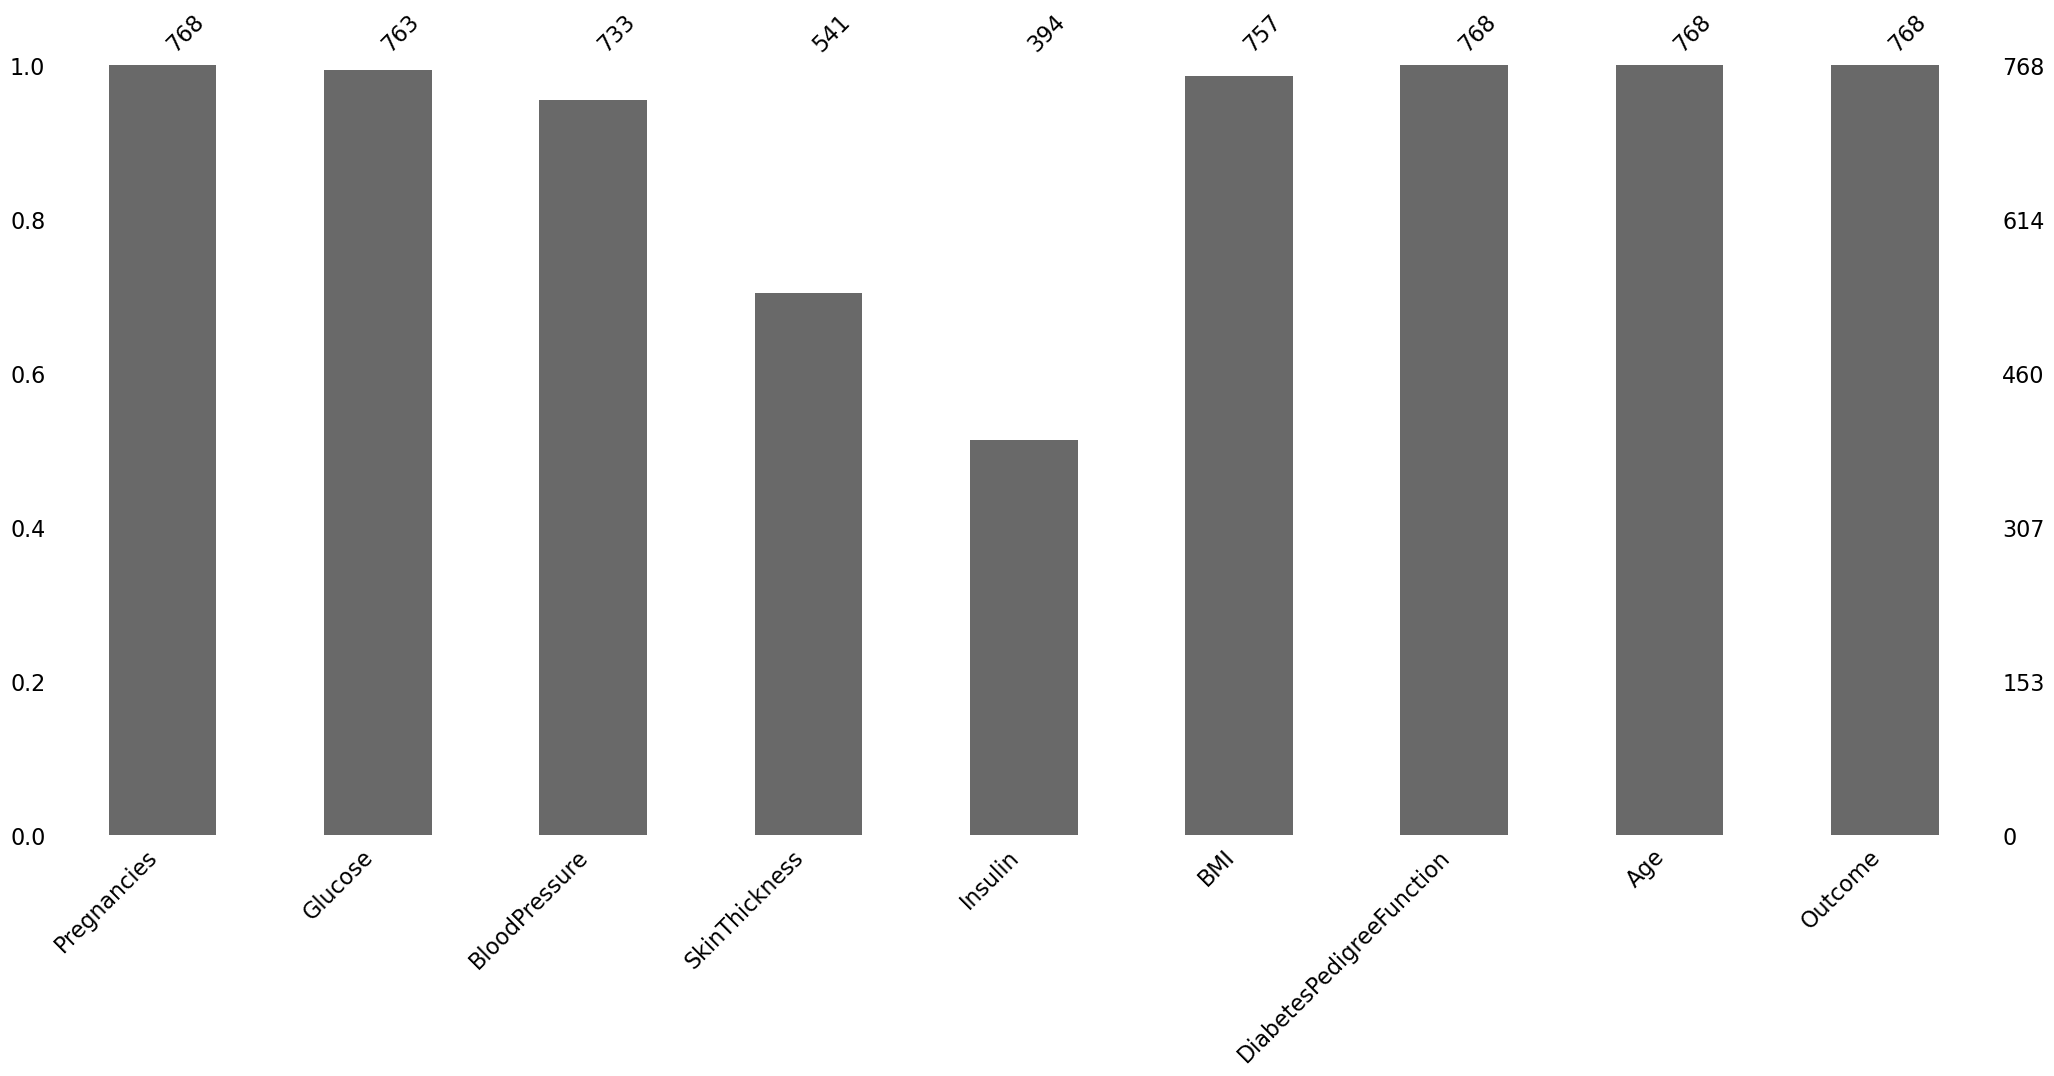

In [43]:
import missingno as msno
msno.bar(df);

### Imputation of median for Nan Values

In [47]:
median_fulldata = df.groupby('Outcome').agg('median')
dp = df.copy()

# Leak imputation
for col in df.columns.drop('Outcome'):
    df.loc[((df[col].isnull()) & (df['Outcome'] == 0)),col] = median_fulldata[col][0]
    df.loc[((df[col].isnull()) & (df['Outcome'] == 1)),col] = median_fulldata[col][1]

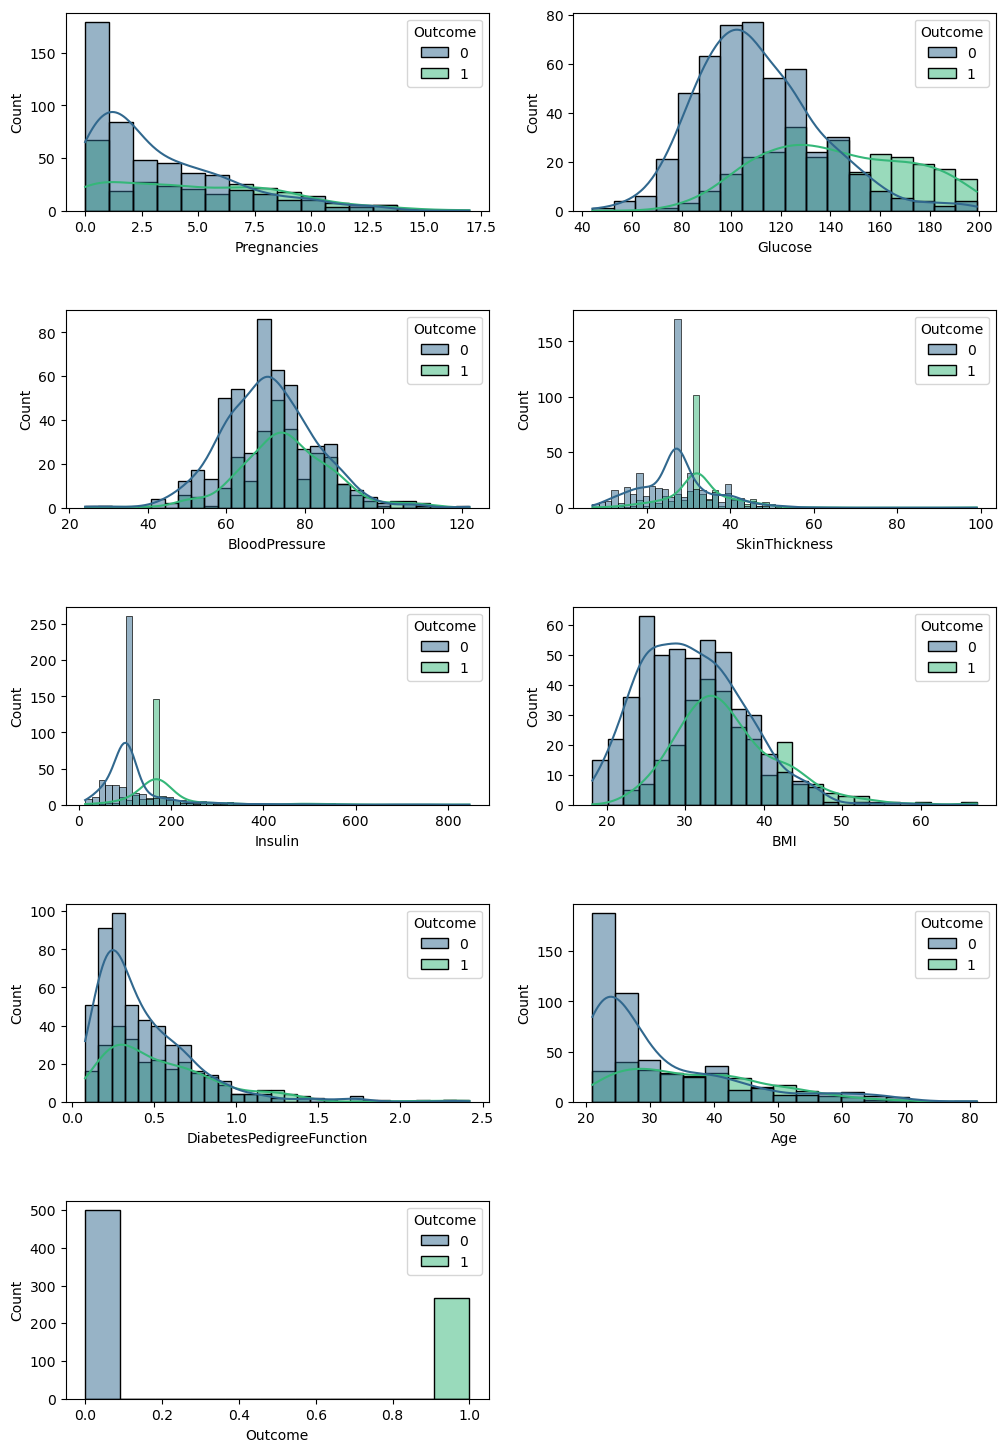

In [48]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [49]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64